In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,NaN,2.0,7.0,8.0,NaN,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,NaN,NaN
2,NaN,10.0,NaN,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,NaN,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,NaN,7.0,7.0,NaN,1.0,NaN,6.0,8.0,3.0,NaN,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,NaN,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,NaN,5.0,8.0,3.0,4.0,10.0,7.0,8.0,NaN,10.0,9.0,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,10.0,12.0,6.0,8.0,1.0,NaN,6.0,8.0,NaN
19997,4.0,8.0,NaN,6.0,4.0,7.0,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,NaN,NaN
19998,4.0,11.0,4.0,8.0,3.0,0.0,NaN,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	2500
float64		column 2	4000
float64		column 3	5500
float64		column 4	6000
float64		column 5	4500
float64		column 6	5000
float64		column 7	4500
float64		column 8	3500
float64		column 9	2500
float64		column 10	4000
float64		column 11	3500
float64		column 12	2000
float64		column 13	4000
float64		column 14	5500
float64		column 15	3000
float64		column 16	4000
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,17500.000000,16000.000000,14500.000000,14000.000000,15500.000000,15000.000000,15500.000000,16500.000000,17500.000000,16000.000000,16500.000000,18000.000000,16000.000000,14500.000000,17000.000000,16000.000000,0.0
mean,4.023314,7.086563,5.114483,5.411143,3.468968,6.924600,7.481355,4.614000,5.186514,8.239562,6.434303,7.925778,3.010562,8.312690,3.666824,7.816937,NaN
std,1.853089,3.126528,1.819952,2.020282,2.038061,1.834213,2.112483,2.562493,2.305082,2.333509,2.477877,2.020244,2.181198,1.369927,2.450509,1.495808,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,7.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,4.000000,8.000000,8.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,15.000000,NaN


<AxesSubplot:>

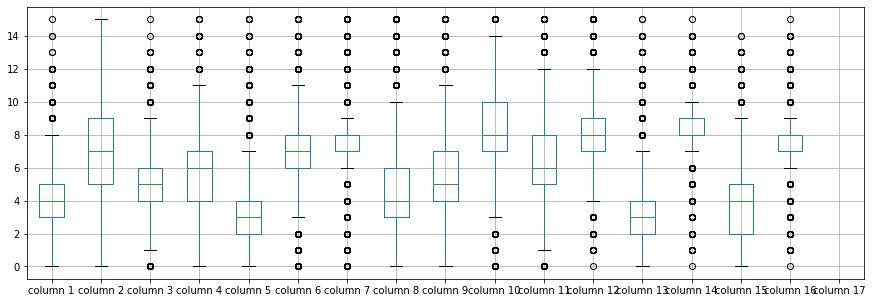

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.023314
column 2     7.086563
column 3     5.114483
column 4     5.411143
column 5     3.468968
column 6     6.924600
column 7     7.481355
column 8     4.614000
column 9     5.186514
column 10    8.239562
column 11    6.434303
column 12    7.925778
column 13    3.010562
column 14    8.312690
column 15    3.666824
column 16    7.816937
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.732358,0.814838,0.620295,0.583253,-0.029011,0.034587,0.007457,0.043150,0.141444,0.040053,-0.044771,0.453232,0.100892,0.260158,-0.103831,NaN
column 2,0.732358,1.000000,0.599593,0.779293,0.511840,0.022723,-0.036238,-0.022548,0.078419,0.145838,-0.044097,-0.009442,0.245850,0.009644,0.208952,-0.038138,NaN
column 3,0.814838,0.599593,1.000000,0.586492,0.711725,0.058963,0.018256,-0.088489,0.050139,0.094043,0.006030,-0.051450,0.504741,0.044789,0.230625,-0.096799,NaN
column 4,0.620295,0.779293,0.586492,1.000000,0.573490,0.017481,-0.032941,0.078792,0.055274,0.006060,-0.008213,0.022355,0.227870,0.006650,0.254333,-0.015972,NaN
column 5,0.583253,0.511840,0.711725,0.573490,1.000000,0.118497,-0.026472,-0.016212,-0.068792,-0.049776,-0.055334,-0.030775,0.557742,0.019356,0.438799,-0.060209,NaN
column 6,-0.029011,0.022723,0.058963,0.017481,0.118497,1.000000,-0.312701,-0.038666,-0.116810,0.067071,-0.307486,-0.032535,0.126451,-0.219381,0.109714,0.209548,NaN
column 7,0.034587,-0.036238,0.018256,-0.032941,-0.026472,-0.312701,1.000000,-0.121893,-0.046710,0.137879,0.552710,-0.228199,-0.036086,0.471411,-0.080474,-0.175066,NaN
column 8,0.007457,-0.022548,-0.088489,0.078792,-0.016212,-0.038666,-0.121893,1.000000,-0.172659,-0.300836,0.024349,0.087032,0.122786,-0.064058,0.018226,0.158507,NaN
column 9,0.043150,0.078419,0.050139,0.055274,-0.068792,-0.116810,-0.046710,-0.172659,1.000000,0.123504,-0.054710,0.105179,-0.350283,-0.043367,0.245790,-0.054843,NaN
column 10,0.141444,0.145838,0.094043,0.006060,-0.049776,0.067071,0.137879,-0.300836,0.123504,1.000000,0.040803,-0.113211,-0.157989,0.039201,-0.091025,-0.101938,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+18,17+18+18,17+18+18+18,17+18+18,17+18,17], vae_layer = False, seed = 180)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 57.21510147094727
Epoch: 1 , loss: 38.51909139251709
Epoch: 2 , loss: 35.6212240234375
Epoch: 3 , loss: 34.25485035552978
Epoch: 4 , loss: 33.595146096801756
Epoch: 5 , loss: 33.189690924072266
Epoch: 6 , loss: 32.786154174804686
Epoch: 7 , loss: 32.610852920532224
Epoch: 8 , loss: 32.25566880493164
Epoch: 9 , loss: 32.24933523864746
Epoch: 10 , loss: 32.097819104003904
Epoch: 11 , loss: 32.01527274017334
Epoch: 12 , loss: 32.008273429870606
Epoch: 13 , loss: 31.88323348083496
Epoch: 14 , loss: 31.881229342651366
Epoch: 15 , loss: 31.725975379943847
Epoch: 16 , loss: 31.56125196838379
Epoch: 17 , loss: 31.626104370117186
Epoch: 18 , loss: 31.648473571777345
Epoch: 19 , loss: 31.49985941314697
Epoch: 20 , loss: 31.47093597869873
Epoch: 21 , loss: 31.425354026794434
Epoch: 22 , loss: 31.400969271850585
Epoch: 23 , loss: 31.392753826904297
Epoch: 24 , loss: 31.456477253723143
Epoch: 25 , loss: 31.51148872

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     5.035860
column 4     5.371133
column 5     1.000000
column 6     1.000000
column 7     7.501506
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17    0.006493
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.000000,0.000000,0.000000,1.151238,0.000000,0.000000,0.000000,1.328593,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,-3.035042,NaN
2,-3.171278,0.000000,-3.181646,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,2.656466,0.000000,0.000000,NaN
3,0.000000,0.000000,0.000000,0.000000,0.898681,0.000000,0.000000,-7.069264,0.0,3.843518,0.0,0.0,0.0,2.927904,0.000000,0.000000,NaN
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.518127,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,-2.536752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-3.078248,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN
19996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,-0.485478,0.000000,0.000000,NaN
19997,0.000000,0.000000,2.143373,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.600629,NaN
19998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.800725,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

770.7777230036562

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.20643160721174716

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3      6.889683
column 4      7.000000
column 5      4.707667
column 6     10.000000
column 7     10.322298
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13     3.992855
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17     0.003582
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.000000,4.000000,4.000000,4.151238,2.000000,7.000000,8.000000,3.328593,9.0,11.000000,7.0,7.0,1.0,8.000000,5.000000,6.000000,0.002493
1,4.000000,7.000000,5.000000,5.000000,5.000000,5.000000,9.000000,6.000000,4.0,8.000000,7.0,9.0,2.0,9.000000,7.000000,6.964958,-0.001761
2,3.828722,10.000000,4.818354,7.000000,4.000000,8.000000,8.000000,5.000000,10.0,11.000000,2.0,8.0,2.0,7.656466,5.000000,10.000000,-0.001322
3,4.000000,9.000000,5.000000,7.000000,4.898681,7.000000,7.000000,5.930736,1.0,10.843518,6.0,8.0,3.0,10.927904,0.000000,8.000000,0.005095
4,6.000000,7.000000,8.000000,5.000000,4.000000,7.000000,6.000000,3.000000,7.0,10.000000,7.0,9.0,3.0,8.000000,3.518127,7.000000,0.003277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.000000,7.463248,5.000000,8.000000,3.000000,4.000000,10.000000,7.000000,8.0,8.921752,10.0,9.0,2.0,9.000000,2.000000,6.000000,0.008096
19996,4.000000,7.000000,6.000000,5.000000,3.000000,7.000000,8.000000,2.000000,10.0,12.000000,6.0,8.0,1.0,8.514522,6.000000,8.000000,0.004407
19997,4.000000,8.000000,6.143373,6.000000,4.000000,7.000000,8.000000,7.000000,4.0,10.000000,7.0,6.0,3.0,9.000000,3.000000,9.600629,0.001438
19998,4.000000,11.000000,4.000000,8.000000,3.000000,0.000000,8.800725,4.000000,6.0,1.000000,0.0,7.0,0.0,8.000000,0.000000,8.000000,0.000716


In [21]:
imputations[-1].to_excel("Letter_NW_20(imp).xlsx", index=False, header=False)